In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats



import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of WASP-19b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-19b

In [3]:
df = pd.read_csv("WASP_19b_literature.csv")#, header=None)
df = df.set_index('Parameter')


In [4]:
df

,Cortes-Zuleta et al. 2020,Patel & Espinoza 2022,Ivshina & Winn 2022,Kokori et al. 2022,Bonomo et al. 2017,Barstow et al. 2017,Wong et al. 2016,Sing et al. 2016,Sedaghati et al. 2015,Knutson et al. 2014,Lendl et al. 2013,Tregloan-Reed et al. 2013,Hellier et al. 2011,ExoFOP-TESS TOI
Parameter,,,,,,,,,,,,,,
b,0.6671+0.0087-0.0091,0.637+0.021-0.025,---,---,---,---,---,---,---,---,0.645+/-0.012,---,0.657+/-0.015,---
w,51.0+89.0-190.0,---,---,---,---,---,259+13-170,---,---,260+15-170,43+28-67,---,3+/-70,---
e,0.0126+0.0140-0.0089,---,---,---,0.0061,---,0.0020+0.0140-0.0020,---,---,0.00240+0.00940-0.00190,0.00770+0.00680-0.00320,---,0.0046+0.0044-0.0028,---
i,79.08+0.34-0.37,---,---,---,80.50+/-0.70,---,78.78+/-0.58,---,80.36+0.76-0.81,---,79.54+/-0.33,78.94+/-0.23,79.4+/-0.4,---
P,0.78883852+0.00000075-0.00000082,0.7888390+/-0.0000000,0.788839025+/-0.000000022,0.788839195+/-0.000000019,0.7888396+/-0.0000010,---,0.788838989+/-0.000000040,0.79,---,---,0.7888390+/-0.0000002,0.78883942+/-0.00000033,0.7888400+/-0.0000003,0.7888392476341+/-0.0000004881454
R,1.415+0.044-0.048,---,---,---,1.310+/-0.060,---,1.392+/-0.040,1.41,---,---,1.376+/-0.046,1.395+/-0.025,1.386+/-0.032,1.43855300662365+/-0.06842772956153
a,0.01652+0.00050-0.00056,---,---,---,0.01649+0.00053-0.00056,---,0.01634+/-0.00024,---,---,---,0.01653+/-0.00046,0.01616+/-0.00027,0.01655+/-0.00013,---
transit_duration,1.607+/-0.007,---,---,---,---,---,---,---,---,---,1.581+/-0.008,---,1.5720+/-0.0072,1.59671071367818+/-0.00960537900000
T_c,2456402.7128+0.0017-0.0014,2458556.24349+/-0.00009,2456977.776606+/-0.000042,2456688.273095+/-0.000023,2454775.33745+/-0.00035,---,2455708.534626+/-0.000019,---,2456977.77722+/-0.00013,---,2456029.59204+/-0.00013,2454775.33754+/-0.00018,2455168.96801+/-0.00009,2459304.0627150+/-0.0001451


In [5]:
df_ref_list = df.columns

df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
df_w_list = df.loc['w']
df_color = df.loc['colour'] #Colours

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)



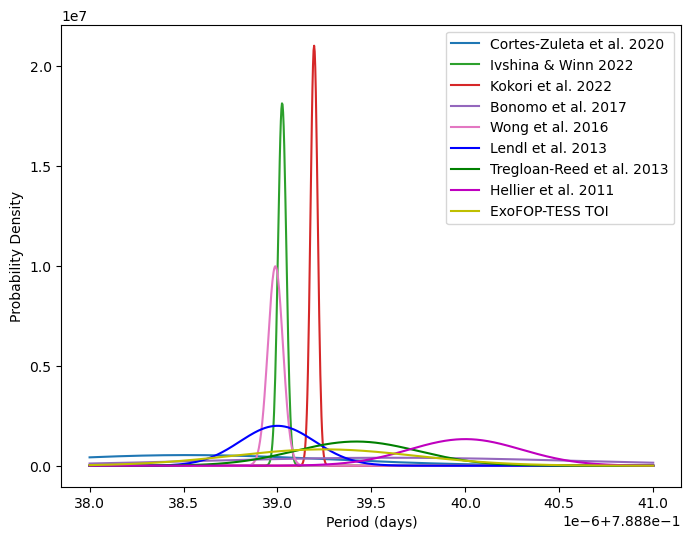

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.788838, 0.788841, 1000)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

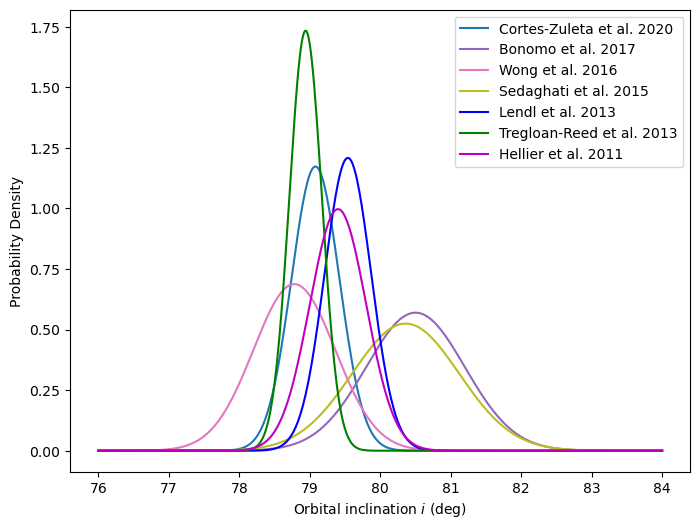

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(76, 84, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

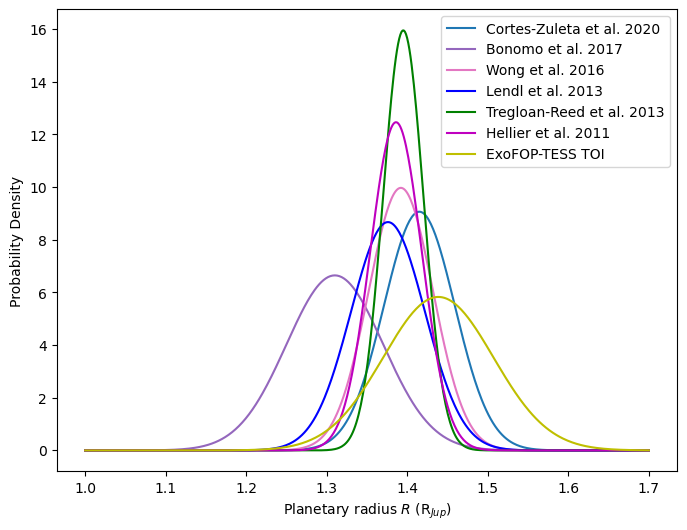

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(1, 1.7, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planetary radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

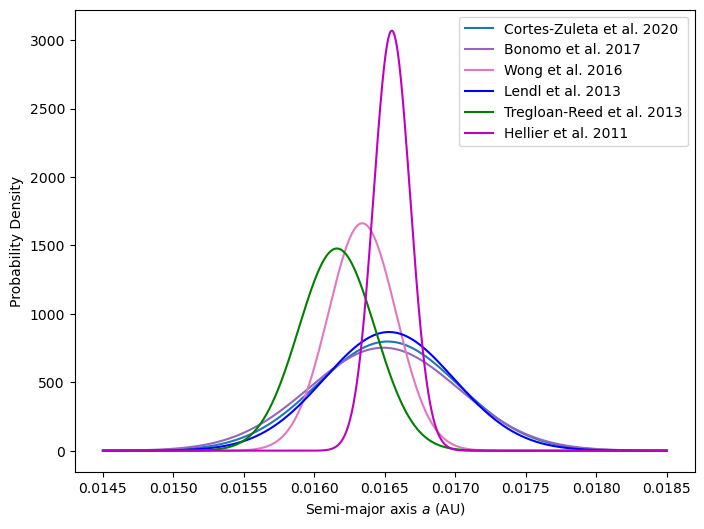

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0145, 0.0185, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Semi-major axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

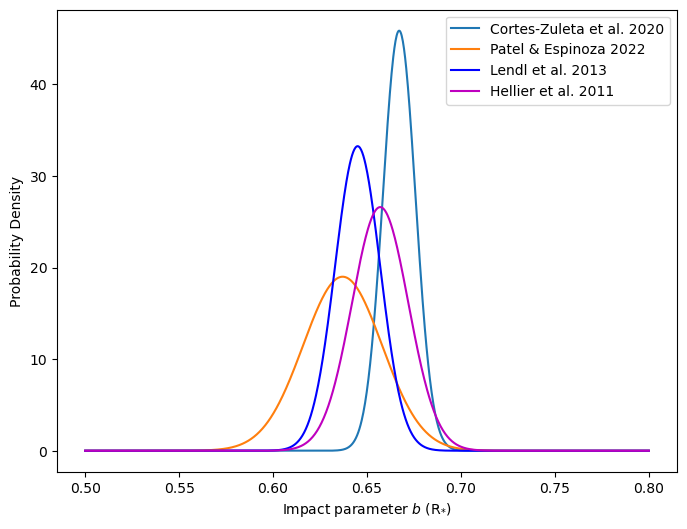

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.5, 0.8, 1000)
for b_obj, author in zip(b_list, b_ref_list):
    mu, upper, lower = b_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Impact parameter $b$ (R$_{*}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

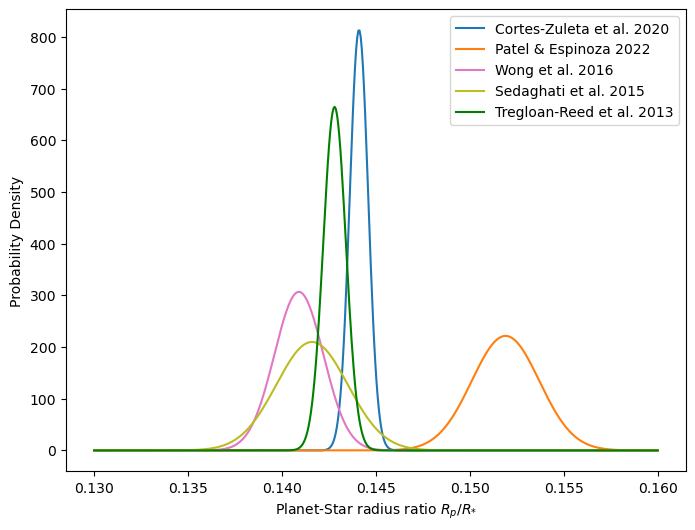

In [11]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.13, 0.16, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()